# 第4回Pythonで実践する深層学習勉強会

<center>
浅川伸一 __asakawa@ieee.org__
</center>

# CNN 編

# 準備

### 斜め上な偉そうな前口上：ニューラルネットワークによって計算されるもの-

入力層に与えられたデータを順方向すなわち前向き feed forward に層を辿って順次計算することによって最終出力層のニューロンの値を計算する。
このような計算によって求められた出力をニューラルネットワークにおける判断，分類，認識，回帰などとみなされる。

一方，ニューラルネットワークの出力精度を改善するためにはニューロン間の結合係数を変化させることが必要となる。このときの教師信号とネットワークの出力とネットワークの状態の３者に基づいて損失関数（誤差関数）を定義し，損失関数を減少させる方向へ結合係数を変化させることを学習と呼ぶ。

学習の際に手がかりとなるのは損失関数（誤差関数）を結合係数の値を更新する際に勾配降下法 gradient decent が用いられる。盲目のハイカーの喩え blind hiker analogy から近傍の傾斜に沿って損失関数の坂を降りていくことが学習とみなされる。

学習時には近傍の傾斜を下ることから損失関数に関して，着目する変数の影響を求め，順次逆方向へ計算を行う。すなわち出力層から順方向の出力値の計算の逆を辿って逆方向 backward に逐次計算が行われる。

---

### 学校数学との関連付け

ニューラルネットワークを学習させる際に結合係数で微分する必要がある。関数を関与するパラメータで微分するとも言う。

ある数 $x$ を $y$ へと変換する写像 $f:x\rightarrow y$ を $y=f(x)$ と書くとする。$y$ を別の写像 $g$ によって $z$ へと変換することは $g:y\rightarrow z$ と表記できる。これはニューラルネットワークと対応させて考えれば，入力信号 $x$ を中間層のニューロンによって $y$ に変換され，その $y$ が出力値として $z$ を出力することになる。
\begin{align}
y &= f(x)\\
z &= g(y) 
\end{align}
一行で表現すれば，$z=g(y)=g(f(x))$ である。$z$ は $y$ の関数であるが，$y$ は $x$ の関数であるので，関数(写像) $f$, $g$ が共に微分可能であれば，$z$ を $x$ で微分することができる。

- 高校数学の公式に即して書けば
$$\frac{dz}{dy}\frac{dy}{dx}$$
あるいは
$$\left\{g(f(x))\right\}'=g'\left(f\left(x\right)\right)f'\left(x\right)$$
である。[http://mathtrain.jp/composite](http://mathtrain.jp/composite)


$$\left\{g\left(f\left(x\right)\right)\right\}'=\frac{dz}{dy}\frac{dy}{dx}$$

ニューラルネットワークで頻用される表記との対応で言えば，上の表記では：

- $z$ : 最終層（出力層）のニューロンの出力
- $y$ : 中間層のニューロンの出力
- $x$ : 入力層のニューロンにセットされる入力値
- $f$ および $g$ : ニューロンへの入力を出力へと変換する関数。非線形写像が用いられる場合が多い。

である。

<div class="fig figcenter fighighlight">
  <img src="./assets/perceptron.png" width="74%">
  <div class="figcaption">
  パーセプトロン(Perceptron, Rosenblatt(1959))の模式図
  </div>
</div>

###  表記
<b>深層学習</b> すなわち多層ニューラルネットワークを扱うので(文献では MLP: Multi-Layered Perceptrons と表記される)上の表記を変更しておく。

- $x$ をニューロンの活性値とし，入力層から数えて $i$ 層目の $j$ 番目のニューロンの活性値を $x_i^{(j)}$ と表記する。
- 入力層は $0$ 層目とみなせば $x_1^{(0)}$　は入力データのうち $1$ 番目のニューロンに与える数値を表している。
- 下付き添字 subscript は番号付けされたニューロンの指す場合に使われる。
- 上付き添字 superscript はカッコを付けて階層的ニューラルネットワークの層を表すとする。このとき，べき乗と区別するためにカッコをつける。$x_1^{2}$ は第２層の１番目のニューロンの出力値を表している。
- 活性化関数は多値入力，一出力 many to one である場合が多い。プログラミング言語に多く見られる関数の定義と同じように引数が複数個存在し，戻り値が一つである関数と酷似している。
- 活性化関数への引数は前層のニューロンとの結びつきを表現する結合強度 connection legth(結合係数 connection coefficient，重み weight とも呼ぶ)とによる荷重総和である。
- 荷重総和は総和記号 $\sum$ を用いることで $\sum_{i=1}^{m}w_ix_i$ と表記される。$m$ は関与する下位層のニューロンの総数である。
- 各ニューロンの出力値を計算するためには荷重総和とバイアス bias を合わせてから，非線形写像 $f$ によって変換されるので
$f\left(\sum_{i}w_ix_i+b\right)$ と表記される。

In [1]:
# Define the neural network function y = x * w + b
def total_input(x, w, b):
    return x * w + b

# Define the cost function
def cost(y, t): 
    return ((t - y)**2).sum()

- 写像 $f$ を **活性化関数 activation function** とする
- 第 $k$ 層の $i$ 番目のニューロンの出力値 $x_i^{(k)}$ は次のように表記できる：
$$ x_i^{(k)} = f\left(\sum_{i=1}^{m}w_{i}x_{i}^{(k-1)}+b_{i}^{(k)}\right) $$
- バイアス項は常に $1$ を出力する特別な入力値であるとみなして表記を簡単にするために $0$ 番目の入力として扱うと：
$$ x_i^{(k)} = f\left(\sum_{i=0}^{m}w_{i}x_{i}^{(k-1)}+b_{i}^{(k)}\right) $$
とする表記も行われてきた。
- C や Python のメモリ配置ではメモリ先頭番地を $0$ とする場合が多いので繰り返しは $n$ 回の繰り返しを $0$　から $n-1$ 回までのカウンタとする場合が多いので上記のようにバイアス項を $0$ 番目の要素として組み込むより，別の項として扱うことが最近は多いようである。()
- ３層パーセプトロン(実際には入力層は値をセットするだけなので演算は２層しか行われない)を表記すれば

\begin{align}
y_i=x_i^{(2)}&=f\left(\sum_{j}w_{j}^{(1)}x_{j}^{(1)}+b_{i}^{(2)}\right)\\
&=f\left(\sum_{j}w_{j}^{(1)}\left(f\left(\sum_{k}w_{k}^{(0)}x_{k}^{(0)}+b_{j}\right)\right)+b_{i}^{(2)}\right)\\
\end{align}

- ３層パーセプトロンを $n$ 層まで多層化すれば深層学習器となる。
- 教師信号を $t$ とし，損失関数が教師信号との誤差の自乗和で定義され，かつ正則化項を含まないとすれば
$$\xi=\sum_{i}\left(t_{i}-y_{i}\right)^{2}$$

- 損失関数が上記[自乗誤差](http://en.wikipedia.org/wiki/Euclidean_distance#Squared_Euclidean_distance) 
で定義されるとする（どのような損失関数を定義するのが良いのかについては決定版はない）。
$\xi = \sum_{i=1}^{N} \Vert t_i - y_i \Vert ^2$　は $N$ 個の訓練データについて合算することを表現している。

それゆえ最適化すべき目標は: $$\underset{w}{\text{argmin}} \sum_{i=1}^{N} \Vert t_i - y_i \Vert^2$$

となる。

- 全訓練データを読み込んで一気に結合係数を更新する方法をバッチ学習と呼び，各データそれぞれについてその都度結合係数を更新する
方式をオンライン学習と呼ぶ。

- データ数の増加に伴いバッチ学習は，全データについて行うのではなく，訓練データを分割したミニバッチごとに更新を行う方法が一般的となっている。

- 入力値と教師信号とが与えられれば上記損失関数は計算可能である。この損失関数の中で $f$, $w$, $x$, $b$ のうち調整可能なパラメータ（引数）は $w$ と $b$ であると考える。
- 従って $w$ と $b$ について各々微分すれば学習が可能となる。
- 関与する引数のうち，いずれか一つだけに着目して微分するので通常の微分ではなく **偏微分 partial differential** 記号　$\partial$　を用いる

---

## MLPの問題点

1. <font color="green">勾配消失問題 gradient vanishing problem</font>
2. <font color="green">責任割当問題 credit assignment problem</font>

これら２点の問題を解決する諸手法を元に多層化ニューラルネットワークが構成される。
総称して **深層学習 deep learning** と呼ばれる。

---

## 1. 有名なCNNモデル

---

## 1.1. ネオコグニトロン(Fukushima, 1980)

* S 細胞と C 細胞との繰り返し。最初の多層（深層）化された物体認識モデルととらえることが可能
    - S 細胞：生理学の単純細胞 simple cells に対応。受容野 receptive fileds の概念を実現。特徴抽出，特徴検出を行う。<br>
    - C 細胞：複雑細胞 complex cells に対応。広い受容野。位置，回転，拡大縮小の差異を吸収<br>

<div class="fig figcenter fighighlight">
  <img src="./assets/Neocognitron.jpeg" width="64%">
  <div class="figcaption">
  ネオコグニトロンの模式図
  </div>
</div>

---

## 1.2. LeNet5 (LeCun, 1998)
- **LeNet**. Yann LeCun (現 Facebook AI 研究所所長)による CNN 実装
 [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)手書き数字認識
 
<div class="fig figcenter fighighlight">
  <img src="./assets/1998LeNet5.png" width="84%">
<div class="figcaption">
  LeNet5 の論文より改変
  </div>
</div>

- 畳込層とプーリング層（発表当初はサブサンプリング）との繰り返し
    - 畳込とプーリングは<font color="green">局所結合</font>
- MNIST を用いた１０種類の手書き文字認識
- 最終２層は全結合層をつなげて最終層１０ニューロン，最終層の各ニューロンの出力がそれぞれの数字（０から９までの１０種）に対応する

---

## 1.3. AlexNet(Krizensky+2012)

**AlexNet**. サポートベクターマシンを破った最初の CNN [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks) by Alex Krizhevsky, Ilya Sutskever and Geoff Hinton. AlexNet は[大規模画像認識チャレンジ](http://www.image-net.org/challenges/LSVRC/2014/) で誤差２６％を達成した。

<div class="fig figcenter fighighlight">
  <img src="./assets/2012AlexNet.png" width="94%">
</div>


---

## 1.4. ZF Net(2013)  
2013年度チャンピオン(Matthew Zeiler と Rob Fergus) [ZFNet](http://arxiv.org/abs/1311.2901) 

## 1.5. GoogLeNet (2014)
**GoogLeNet**. 2014年度チャンピオン [Szegedy et al.](http://arxiv.org/abs/1409.4842) Google チームによる LeNet へのオマージュとして命名された。インセプションモジュールによりパラメータ数の減少を実現。tf には
後続モデルも実装されている[Inception-v4](http://arxiv.org/abs/1602.07261)

<div class="fig figcenter fighighlight">
  <img src="./assets/2015GoogLeNet_Fig3.jpg" width="94%">
  <div class="figcaption">
  GoogLeNet 赤い楕円で囲った上の数字はインセプションモジュールの数
  </div>
  <img src="./assets/2015GoogLeNet_Inception_module.png" width="49%">
  <div class="figcaption">
  インセプションの拡大図
  </div>
</div>

---

## 1.5. VGG net (2014)
Karen Simonyan と Andrew Zisserman [VGGNet](http://www.robots.ox.ac.uk/~vgg/research/very_deep/)
ほぼ均質な 16 層構造。The simpler, the better なので人気がある。畳込の範囲は 3x3 か 2x2 しか使われていない。[Caffe による学習済モデル](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) もある。
シンプルなので応用範囲が広い。

<div class="fig figcenter fighighlight">
  <img src="./assets/2014VGG.png" width="94%">
  <div class="figcaption">
  VGG の論文より
  </div>
</div>

---

## 1.6. 空間ピラミッドネットワーク SPP net (2014)

<div class="fig figcenter fighighlight">
  <img src="./assets/2014SPP.png" width="74%">
  <div class="figcaption">
  SPP の概念図
  </div>
</div>

---

## 1.7. 残渣ネット ResNet (2015)
[Residual Network](http://arxiv.org/abs/1512.03385) 2015年のチャンピオンで人間超え。Kaiming He ら
マイクロソフトアジアのチーム。ショートカット結合と[バッチ正規化](http://arxiv.org/abs/1502.03167)が特徴。 [プレゼンビデオ](https://www.youtube.com/watch?v=1PGLj-uKT1w), [スライド](http://research.microsoft.com/en-us/um/people/kahe/ilsvrc15/ilsvrc2015_deep_residual_learning_kaiminghe.pdf)), [Torch 実装](https://github.com/gcr/torch-residual-networks) 
 [2016 年の論文](https://arxiv.org/abs/1603.05027)
 
<div class="fig figcenter fighighlight">
  <img src="./assets/2015ResNet30.png" width="94%">
  <div class="figcaption">
  ResNet 30層の例
  </div>
</div>

---

# 2. CNN の出力関数

学習可能な重み係数とバイアスがを持つニューロンで $f=\left(\sum_i w_ix_i + b\right)$ 構成される。<br>
複数入力，１出力の非線形出力関数を持つ。

tf でサポートされている出力関数としては：<br>

- [tf.nn.relu(features, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#relu) 
$$ReLU\left(x\right)=\max\left(0,x\right)$$
- [tf.nn.relu6(features, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#relu6) 
$$ReLU6\left(x\right)=\min\left(\max\left(0,x\right),6\right)$$
- [tf.nn.crelu(features, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#crelu)
$$crelu\left(x\right)=\left(\left[x\right]_{+},\left[-x\right]_{-}\right)$$
- [tf.nn.elu(features, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#elu) 
$$elu\left(x\right)=\left\{
\begin{align}
x       & \hspace{3em}if x>0\\
e^{x}-1 & \hspace{3em}otherwise
\end{align}\right.$$
- [tf.nn.softplus(features, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#softplus) 
$$softplus\left(x\right)=\log\left(1+e^{x}\right)$$
- [tf.nn.softsign(features, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#softsign)
$$softsign\left(x\right)=\frac{x}{\Vert x\Vert+1}$$
- [tf.nn.dropout(x, keep_prob, noise_shape=None, seed=None, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#dropout)
- [tf.nn.bias_add(value, bias, data_format=None, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#bias_add)
- [tf.sigmoid(x, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#sigmoid) $$\sigma(x)=\frac{1}{1+e^{-x}}$$
- [tf.tanh(x, name=None)](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#tanh) $$\phi\left(x\right)=\tanh\left(x\right)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

がある

1.0


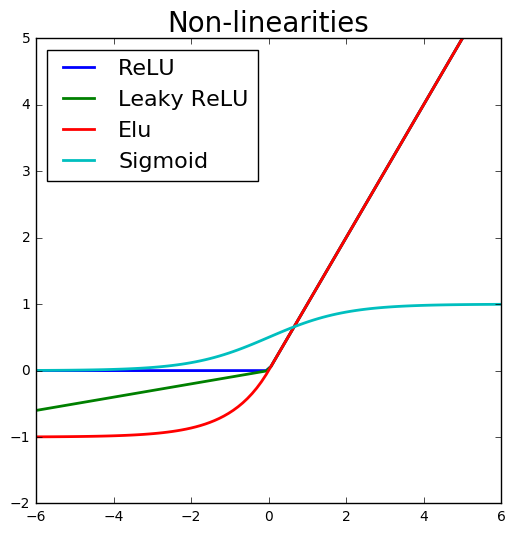

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## from alrojo_tensorflow-tutorial/lab1_FFN/lab1_FFN.ipynb
## ported by Shi Asakawa

# PLOT OF DIFFERENT OUTPUT USNITS
x = np.linspace(-6, 6, 100)
relu = lambda x: np.maximum(0, x)
leaky_relu = lambda x: np.maximum(0, x) + 0.1*np.minimum(0, x) 
elu = lambda x: (x > 0)*x + (1 - (x > 0))*(np.exp(x) - 1) 
sigmoid = lambda x: (1+np.exp(-x))**(-1)
def softmax(w, t = 1.0):
    e = np.exp(w)
    dist = e / np.sum(e)
    return dist
x_softmax = softmax(x)

plt.figure(figsize=(6,6))
plt.plot(x, relu(x), label='ReLU', lw=2)
plt.plot(x, leaky_relu(x), label='Leaky ReLU',lw=2)
plt.plot(x, elu(x), label='Elu', lw=2)
plt.plot(x, sigmoid(x), label='Sigmoid',lw=2)
plt.legend(loc=2, fontsize=16)
plt.title('Non-linearities', fontsize=20)
plt.ylim([-2, 5])
plt.xlim([-6, 6])

# softmax
# assert that all class probablities sum to one
print(np.sum(x_softmax))
assert abs(1.0 - x_softmax.sum()) < 1e-8

<!-- [http://cs231n.github.io/convolutional-networks/](http://cs231n.github.io/convolutional-networks/)より -->

## 最終層（あるいは最終２層）は全結合層

ドット積を実行し、得られた結果に非線形活性化関数により出力を計算<br>
ネットワーク全体は、一方の生画像ピクセルから他方のクラススコアまで、単一の微分可能なスコア関数を依然として表現している。 最上位層の全結合層には損失関数（SVM/Softmax）がある。通常のニューラルネットワークの学習と同じ手法を用いる

# 2. CNN のあらまし

通常のニューラルネットワークでは，直下層のニューロンとそのすぐ上の層の全ニューロンと結合を有する。一方 CNN ではその結合が部分的である。
各ニューロンは多入力一出力の信号変換機とみなすことができ，活性化関数に非線形な関数を用いる点は通常のニューラルネットワークと同様。

画像処理を考える場合，典型的には一枚の入力静止画画像は 3 次元データである。次元は幅w，高さh，奥行きd であり，入力画像では奥行きが３次元，すなわち赤緑青の三原色。出力ニューロンへの入力は局所結合から小領域に限局される。

## 2.1. CNNの構成

CNN は以下のいずれかの層から構成される：

1. **畳込み層**
2. **プーリング層**
3. **完全結合層**（通常のニューラルネットワークと正確に同じもの，CNN では最終 1 層または最終 1,2 層に用いる）

入力信号はパラメータの値が異なる活性化関数によって非線形変換される。
畳込み層とプーリング層と複数積み重ねることで多層化を実現し，深層ニューラルネットワークとなる。

### 2.2.1.  例：
- <!--CNNの最も単純な場合。--> 画像データを出力信号へ変換
- 各層は別々の役割（畳込み，全結合，ReLU, プーリング）
- 入力信号は 3 次元データ，出力信号も 3 次元データ
- 学習すべきパラメータを持つ層は畳込み層，全結合層
- 学習すべきパラメータを持たない層は ReLU 層とプーリング層
- ハイパーパラメータを持つ層は畳込み層, 全結合層, プーリング層
- ハイパーパラメータを持たない層は ReLU層

---

<div class="fig figcenter fighighlight">
  <img src="./assets/cnn/convnet.jpeg" width="74%">
  <!--
  <div class="figcaption">
  CNN アーキテクチャ: 入力層は生画像の画素値(左)を格納、最後層は分類確率(右)を出力。処理経路に沿った活性の各ボリュームは列として示されている。3Dボリュームを視覚化することは難しいため、各ボリュームのスライスを行ごとに配置してある。最終層のボリュームは各クラスのスコアを保持するが、ソートされた上位5スコアだけを視覚化し、それぞれのラベルを印刷してある。
  <a href="http://cs231n.stanford.edu/">ウェブベースのデモ</a>は、ウェブサイトのヘッダーに表示されています。ここに示されているアーキテクチャは、あとで説明する小さなVGG Netです。
</div>
-->
</div>

<!--
The activations of an example ConvNet architecture. The initial volume stores the raw image pixels (left) and the last volume stores the class scores (right). Each volume of activations along the processing path is shown as a column. Since it's difficult to visualize 3D volumes, we lay out each volume's slices in rows. The last layer volume holds the scores for each class, but here we only visualize the sorted top 5 scores, and print the labels of each one. The full <a href="http://cs231n.stanford.edu/">web-based demo</a> is shown in the header of our website. The architecture shown here is a tiny VGG Net, which we will discuss later.
-->
<!--
We now describe the individual layers and the details of their hyperparameters and their connectivities.
-->

<!--
*Example Architecture: Overview*. We will go into more details below, but a simple ConvNet for CIFAR-10 classification could have the architecture [INPUT - CONV - RELU - POOL - FC]. In more detail:

*アーキテクチャ例* CIFAR-10の CNN は [入力層-畳込み層-ReLLU層-プーリング層-全結合層] という構成である。
-->

- 入力層[32x32x3]: 信号は画像の生データ（画素値）幅w(32)，高さh(32)、色チャネル3(R, G, B)
- 畳込み層: 下位層の限局された小領域のニューロンの出力の荷重付き総和を計算(内積，ドット積）。12個のフィルタを使用すると[32x32x12]となる。
- ReLU層の活性化関数は ReLU (Recutified Linear Unit) \\(max(0,x)\\)<!--入力範囲は変更されない([32x32x12])。-->
- プーリング層: 空間次元（幅,高さ）に沿ってダウンサンプリングを実行。[16x16x12]のようになる。
- 全結合層はクラスに属する確率を計算: 10 の数字のそれぞれが CIFAR-10 の 10 カテゴリーの分類確率に対応するサイズ[1x1x10]に変換。通常のニューラルネットワーク同様、全結合層のニューロンは前層の全ニューロンと結合する。

<!--
In this way, ConvNets transform the original image layer by layer from the original pixel values to the final class scores. Note that some layers contain parameters and other don't. In particular, the CONV/FC layers perform transformations that are a function of not only the activations in the input volume, but also of the parameters (the weights and biases of the neurons). On the other hand, the RELU/POOL layers will implement a fixed function. The parameters in the CONV/FC layers will be trained with gradient descent so that the class scores that the ConvNet computes are consistent with the labels in the training set for each image. 
-->

CNN は元画像（入力層）から分類確率（出力層）へ変換。学習すべきパラメータを持つ層（畳込み層，全結合層）とパラメータを持たない層（ReLU層）が存在。畳込み層と全結合層のパラメータは勾配降下法で訓練

---

## 2.3. 畳込層

- 畳込み層のパラメータは学習可能なフィルタの組
- 全フィルタは空間的に（幅と高さに沿って）小さくなる
- フィルタは入力信号の深さと同一
- 第1層のフィルタサイズは例えば 5×5×3（5 画素分の幅，高さ，と深さ 3（３原色の色チャンネル）
- 各層の順方向の計算は入力信号の幅と高さに沿って各フィルタを水平または垂直方向へスライド
- フィルタの各値と入力信号の特定の位置の信号との内積（ドット積）。
- 入力信号に沿って水平，垂直方向にフィルタをスライド
- 各空間位置でフィルタの応答を定める 2 次元の活性化地図が生成される
- 学習の結果獲得されるフィルタの形状には、方位検出器，色ブロッブ，生理学的には視覚野のニューロンの応答特性に類似
- 上位層のフィルタには複雑な視覚パタンに対応する表象が獲得される
- 各畳込み層全体では学習すべき入力信号をすべて網羅するフィルタの集合が形成される
- 各フィルタは相異なる 2 次元の活性化地図を形成
- 各フィルタの応答特性とみなすことが可能な活性化地図
- フィルタの奥行き次元に沿って荷重総和を計算し、出力信号を生成

[畳込演算のデモ](./assets/conv-demo/index.html)

**局所結合**: 画像のような高次元の入力を処理する場合，下位層の全ニューロンと上位層の全ニューロンとを接続することは **責任割当問題回避** の観点からもパラメータ数の増加は現実的ではない。<br>
代わりに各ニューロンを入力ボリュームのローカル領域のみに接続。空間的領域はニューロンの **受容野** と呼ばれるハイパーパラメータ（フィルタサイズとも言う）。<font color="blue">深さ次元に沿った接続性＝入力層の深さ次元</font>。
空間次元（幅と高さ）と深さ次元をどのように扱うかにより，この非対称性を再び強調することが重要です。ニューロン間の結合は空間次元（幅と高さ）にそって限局的。入力次元の深さ全体を常にカバーする。

    - 例1: 入力層のサイズが[32x32x3]（RGB CIFAR-10画像データセットなど）であれば受容野（フィルタサイズ）が 5x5 とすれば，畳込み層内の各ニューロンは入力層の [5x5x3] 小領域への結合係数を持つ。各小領域毎に 5x5x3=75 の重み係数と 1 つのバイアス項が必要である。深さ次元に沿った上層のニューロンから下位層のニューロンへの結合は下位層の深さ(色チャンネル数)と等しく 3 である。

    - 例2: 入力ボリュームのサイズが[16x16x20]であるとすると 3x3 の受容野サイズで畳込層の全ニューロンの合計は 3x3x20=180 接続。接続性は空間的に局在する（3x3）が，入力深度（20）に沿っては完全結合

**空間配置**: 出力層ニューロンの数と配置については 3 つのハイパーパラメータで出力ニューロン数が定まる。

   1. <font color="blue">深さ数(フィルタ数)</font>
   2. <font color="blue">ストライド幅</font>
   3. <font color="blue">ゼロパディング</font>

   1. 出力層ニューロン数のことを出力層の **深さ** 数と呼ぶハイパーパラメータである。深さ数とはフィルタ数（カーネル数）とも呼ばれる。第 1 畳込み層が生画像であれば，奥行き次元を構成する各ニューロンによって種々の方位を持つ線分(エッジ検出細胞)や色ブロッブのような特徴表現を獲得可能となる。入力の同じ領域を **深さ列** とするニューロン集団を **ファイバ** ともいう。

   2. フィルタを上下左右にずらす幅を **ストライド幅** と呼ぶ。ストライド幅が 1 ならフィルタを 1 画素ずつ移動することを意味する。ストライドが 2ならフィルタは一度に 2 画素ずつジャンプさせる。ストライド幅が大きければ入力信号のサンプリング間隔が大きく広がることを意味する。ストライド幅が大きくなれば上位層のニューロン数は減少する。

   3. 入力の境界上の値をゼロで埋め込むことがある。これを **ゼロパディング** という。ゼロパディングの量はハイパーパラメータである。ゼロパディングにより出力層ニューロンの数を制御できる。下位層の空間情報を正確に保存するには入力と出力の幅，高さは同じである必要がある。

  入力層のニューロン数を\\(W\\)，上位にある畳込み層のニューロン数を\\(F\\)，とすれば出力層に必要なニューロン数\\(S\\)は，周辺のゼロパディング を\\(P\\)とすれば \\((W-F+2P)/S+1\\) で算出できる。たとえば下図でストライド 1 とゼロパディング 0 であれば入力 7x7 でフィルタサイズが 3x3 であれば 5x5(=S=(7-3+2x0)/1+1=5) の出力である。ストライド 2 ならば 3x3=(S=(7-3+2x0)/2+1=3) となる。

<!--
We can compute the spatial size of the output volume as a function of the input volume size (\\(W\\)), the receptive field size of the Conv Layer neurons (\\(F\\)), the stride with which they are applied (\\(S\\)), and the amount of zero padding used (\\(P\\)) on the border. You can convince yourself that the correct formula for calculating how many neurons "fit" is given by \\((W - F + 2P)/S + 1\\). For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output. Lets also see one more graphical example:
-->

<div class="fig figcenter fighighlight">
  <img src="./assets/cnn/stride.jpeg">
  <div class="figcaption">
空間配置の例：入力空間の次元（x軸）が1つで受容野サイズ F=3 の場合，入力サイズ W=5, ゼロパディング P=1 であれば，<br>
<b>左図：</b>出力層ニューロン数は (5-3+2)/1+1=5 の出力層ニューロン数となる。ストライド数 S=1 の場合。<br>
<b>右図：</b>s=2，出力層ニューロン数 (5-3+2)/2+1=3 となる。ストライド S=3 ならばボリューム全体にきちんと収まらない場合もでてくる。数式で表現すれば  \\((5-3+2)=4\\) は 3 で割り切れないので、整数の値として一意に決定はできない。<br>
ニューロン結合係数は（右端に示されている）[1,0,-1]でありバイアスはゼロ。この重みはすべての黄色ニューロンで共有される。
</div>

<b>ゼロパディング</b>: 上例では入力次元が 5，出力次元が 5 であった。これは受容野が 3 でゼロ埋め込みを1としたためである。ゼロ埋め込みが使用されていない場合、出力ボリュームは、どれだけの数のニューロンが元の入力に「フィット」するのであろうかという理由で、空間次元がわずか3であったであろう。ストライドが \\(S=1\\) のとき、ゼロ埋め込みを \\(P=(F-1)/2\\) に設定すると、入力ボリュームと出力ボリュームが空間的に同じサイズになる。このようにゼロパディングを使用することは一般的である。CNNについて詳しく説明している完全な理由について説明する。

<b>ストライドの制約</b>: 空間配置ハイパーパラメータには相互の制約があることに注意。たとえば入力に\\(W=10\\)というサイズがあり、ゼロパディングは\\(P=0\\) ではなく、フィルタサイズは\\(F=3\\), \\((W-F+2P)/S+1=(10-3+0)/2+1=4.5\\)よりストライド \\(S=2\\) を使用することは不可能である。すなわち整数ではなくニューロンが入力にわたってきれいにかつ対称的に "適合" しないことを示す。

<font color="blue">AlexNet</font>の論文では，第一畳込層は受容野サイズ \\(F=11\\)，ストライド\\(S=4\\)，ゼロパディングなし\\(P=0\\)。<br>
畳込層 \\(K=96\\) の深さ \\((227-11)/4+1=55\\)。畳込層の出力サイズは [55x55x96]。55x55x96 ニューロンは入力領域 [11x11x3] と連結。全深度列 96 個のニューロンは同じ入力領域[11×11×3]に繋がる。論文中には(224-11)/4+1 となっている。パディングについての記載はない。

**パラメータ共有** パラメータ数を制御するために畳み込み層で使用される。上記の実世界の例を使用すると、最初の畳故意層には 55x55x96=290,400のニューロンがあり、それぞれ 11x11x3=363 の重みと1のバイアスがある。これにより CNN 単独の第 1 層に最大 290400x364=105,705,600 のパラメータが追加される。<!--この数は非常に高いです。-->

<!--
**Parameter Sharing.** Parameter sharing scheme is used in Convolutional Layers to control the number of parameters. Using the real-world example above, we see that there are 55\*55\*96 = 290,400 neurons in the first Conv Layer, and each has 11\*11\*3 = 363 weights and 1 bias. Together, this adds up to 290400 * 364 = 105,705,600 parameters on the first layer of the ConvNet alone. Clearly, this number is very high.
-->

<!--
It turns out that we can dramatically reduce the number of parameters by making one reasonable assumption: That if one feature is useful to compute at some spatial position (x,y), then it should also be useful to compute at a different position (x2,y2). In other words, denoting a single 2-dimensional slice of depth as a **depth slice** (e.g. a volume of size [55x55x96] has 96 depth slices, each of size [55x55]), we are going to constrain the neurons in each depth slice to use the same weights and bias. With this parameter sharing scheme, the first Conv Layer in our example would now have only 96 unique set of weights (one for each depth slice), for a total of 96\*11\*11\*3 = 34,848 unique weights, or 34,944 parameters (+96 biases). Alternatively, all 55\*55 neurons in each depth slice will now be using the same parameters. In practice during backpropagation, every neuron in the volume will compute the gradient for its weights, but these gradients will be added up across each depth slice and only update a single set of weights per slice.
-->

**パラメータ共有** により学習すべきパラメータ数が減少する。
例えば [55x55x96] のフィルタでは深さ次元は 96 個のニューロンで，各深さで同じ結合係数を使うことにすれば
ユニークな結合係数は計 96x11x11x3=34,848 となるので総パラメータ数は 34,944 となる(バイアス項 +96)。各深さで全ニューロン(55x55)は同じパラメータを使用する。逆伝播での学習では，全ニューロンの全結合係数の勾配を計算する必要がある。各勾配は各深さごとに加算され 1 つの深さあたり一つの結合係数集合を用いる。

ある深さの全ニューロンが同じ重み係数ベクトルを共有する場合，畳込み層の順方向パスは各深さスライス内で入力ボリュームとのニューロンの重みの **畳み込み** として計算できることに注意。結合荷重係数集合のことを **フィルタ** または **カーネル** と呼ぶ。入力信号との間で畳込み演算を行うこととなる。

<!--
Notice that if all neurons in a single depth slice are using the same weight vector, then the forward pass of the CONV layer can in each depth slice be computed as a **convolution** of the neuron's weights with the input volume (Hence the name: Convolutional Layer). This is why it is common to refer to the sets of weights as a **filter** (or a **kernel**), that is convolved with the input.
-->

<div class="fig figcenter fighighlight">
  <img src="./assets/cnn/weights.jpeg">
  <div class="figcaption">
AlexNet の学習済フィルタ例：図の 96 個のフィルタは サイズ[11x11x3]。それぞれが 1 つの深さ内の 55×55 ニューロンで共有されている。画像の任意の位置で水平エッジ検出が必要な場合，画像の並進不変構造 translationall-invariant structure 仮定により画像中の他の場所でも有効である。 畳込み層の出力ニューロン数は 55x55 個の異なる位置すべてで水平エッジの検出を再学習する必要はない。
<!--
Example filters learned by Krizhevsky et al. Each of the 96 filters shown here is of size [11x11x3], and each one is shared by the 55*55 neurons in one depth slice. Notice that the parameter sharing assumption is relatively reasonable: If detecting a horizontal edge is important at some location in the image, it should intuitively be useful at some other location as well due to the translationally-invariant structure of images. There is therefore no need to relearn to detect a horizontal edge at every one of the 55*55 distinct locations in the Conv layer output volume.
-->
  </div>
</div>

**パラメーター共有** が意味のない場合もある。CNN への入力画像が特定の中心構造を持っている場合など。たとえば入力画像の片側で全く異なる機能がを学習する必要がある場合などである。眼特異的または髪特異的な特徴が空間的異方性を持つ場合，パラメータ共有を仮定しないので **局所接続層** と呼ばれる。

<!--
Note that sometimes the parameter sharing assumption may not make sense. This is especially the case when the input images to a ConvNet have some specific centered structure, where we should expect, for example, that completely different features should be learned on one side of the image than another. One practical example is when the input are faces that have been centered in the image. You might expect that different eye-specific or hair-specific features could (and should) be learned in different spatial locations. In that case it is common to relax the parameter sharing scheme, and instead simply call the layer a **Locally-Connected Layer**.
-->

---
**Numpy コーディング例** <br>

入力テンソルを `x` とすると：

- 位置(x,y) における *深さコラム* (*ファイバ*)： `X[x,y,:]`
- 深さコラム `d` における入力範囲： `X[:,:,d]` 

**畳込層**: 入力テンソル `X` が `X.shape: (11,11,4)` であり，パディング０とすると (\\(P = 0\\)), 
出力 `V` は以下のように表記できる：<br>

- `V[0,0,0] = np.sum(X[:5,:5,:] * W0) + b0`
- `V[1,0,0] = np.sum(X[2:7,:5,:] * W0) + b0`
- `V[2,0,0] = np.sum(X[4:9,:5,:] * W0) + b0`
- `V[3,0,0] = np.sum(X[6:11,:5,:] * W0) + b0`

`W0` は結合係数行列であり，`b0` はバイアスベクトル，ストライドが 2 であれば：

- `V[0,0,1] = np.sum(X[:5,:5,:] * W1) + b1`
- `V[1,0,1] = np.sum(X[2:7,:5,:] * W1) + b1`
- `V[2,0,1] = np.sum(X[4:9,:5,:] * W1) + b1`
- `V[3,0,1] = np.sum(X[6:11,:5,:] * W1) + b1`
- `V[0,1,1] = np.sum(X[:5,2:7,:] * W1) + b1`
- `V[2,3,1] = np.sum(X[4:9,6:11,:] * W1) + b1`

**畳込層のまとめ**

- 入力は３次元テンソル：\\(W_1 \times H_1 \times D_1\\)
- ４つのハイパーパラメータ：
  - フィルタ数： \\(K\\)
  - 畳込範囲： \\(F\\)
  - ストライド幅： \\(S\\)
  - ゼロパディング量： \\(P\\)

- 出力は３次テンソル：\\(W_2 \times H_2 \times D_2\\)
  - \\(W_2 = (W_1 - F + 2P)/S + 1\\)
  - \\(H_2 = (H_1 - F + 2P)/S + 1\\) 
  - \\(D_2 = K\\)

- パラメータ共有により \\(F \cdot F \cdot D_1\\) 総計\\((F \cdot F \cdot D_1) \cdot K\\) の結合係数とバイアス \\(K\\) 個
- 出力は \\(d\\)-次元の深さで画像上の領域は (\\(W_2 \times H_2\\))。

**im2col**

画像データをテンソルとして扱う場合 MATLAB 由来の `im2col` が役立つ。
1. 入力画像の局所領域を **im2col** によって列ベクトルへ変換。 
入力画像 [227x227x3] とフィルタ [11x11x3] ストライド=4 とすれば $(227-11)/4+1=55$ の位置に沿って画像を切り取る必要がある。出力行列 `X_col` は各列が $55\times55=3025$ となる。受容野が重複していれば **im2col** によってできる行列は冗長になる。
2. 出力層の結合係数行列を列ベクトルへ変換。各行は 96 個のフィルタで行列 `W_row` の大きさは [96 x 363]となる
3. 畳込の演算結果は `np.dot(W_row, X_col)`で与えられる。 

### プーリング層

CNN では，連続する畳込み層間にプーリング層を挿入するのが一般的。プーリング層の役割は，空間次元の大きさに減少させることである。パラメータ，すなわち計算量を減らし，過学習を制御できる。プーリング層は入力の各深さ毎に独立して動作する。最大値のみをとり他の値を捨てることを **マックスプーリング** と呼ぶ。サイズが 2x2 のフィルタによるプーリング層では，入力の深さごとに $2$ つのダウンサンプルを適用し、幅と高さに沿って2ずつ増やして75％の情報を破棄する。この場合 4 つの数値のうち最大値を採用することになる。

<!--
It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. The Pooling Layer operates independently on every depth slice of the input and resizes it spatially, using the MAX operation. The most common form is a pooling layer with filters of size 2x2 applied with a stride of 2 downsamples every depth slice in the input by 2 along both width and height, discarding 75% of the activations. Every MAX operation would in this case be taking a max over 4 numbers (little 2x2 region in some depth slice). The depth dimension remains unchanged. More generally, the pooling layer:
-->

<div class="fig figcenter fighighlight">
  <img src="./assets/cnn/maxpool.jpeg" width="59%" style="border-left: 1px solid black;">
  <div class="figcaption">
一般的なダウンサンプリング演算は <b>マックスプーリング</b> である。図では ストライド 2 すなわち 4 つの数値の中の最大値

<!--
The most common downsampling operation is max, giving rise to <b>max pooling</b>, here shown with a stride of 2. That is, each max is taken over 4 numbers (little 2x2 square).
-->

  </div>
</div>

**平均プーリング**. マックスプーリングではなく *L2正則化プーリング* を行う場合もある。平均プーリングは歴史的な意味あいがあるがマックスプーリングの方が性能が良いとの報告がある。ある画像位置には物理的に一つの値だけが存在するという視覚情報処理が仮定すべき外界の物理的制約を反映していると文学的に解釈することも可能である。

<div class="fig figcenter fighighlight">
  <img src="./assets/cnn/pool.jpeg" width="36%">
  <div class="figcaption">
プーリング層では，入力層ニューロン数の各深さについて空間的ダウンサンプリングを行う。この例は サイズ[224x224x64]の入力層ニューロン数がフィルタサイズ 2 でプールされ，サイズ 2 の出力ニューロン数 [112x112x64] は 2 倍である。奥行き数が保持されている。

<!--
Pooling layer downsamples the volume spatially, independently in each depth slice of the input volume. In this example, the input volume of size [224x224x64] is pooled with filter size 2, stride 2 into output volume of size [112x112x64]. Notice that the volume depth is preserved.    
-->
  </div>
</div>

## 全結合層

全結合層のニューロンは、通常のニューラルネットワークと同じ<br>
前層の全ニューロンと結合を持つ<br>

## CNN アーキテクチャ

1. 畳込層
2. プーリング層
3. 全結合層

層は以上 3 種類が一般的。

### CNN の層構造

入力層 $\rightarrow$ [[畳込層 $\rightarrow$ ReLU]$\times N\rightarrow$ プーリング(?)]$\times$ M $\rightarrow$ [全結合層 $\rightarrow$ ReLU] $\times$ K $\rightarrow$ 全結合層

最近のトレンドとしては大きなフィルタより小さなフィルタが好まれる傾向にある。<br>
[3x3] が好まれる理由はど真ん中がある奇関数を暗黙に仮定しているためだと思われる（浅川の妄想）。
その代わり多段にすれば [3x3] が２層で ［5x5]，３層で[7x7]の受容野を形成できるから受容野の広さを層の深さとして実装しているとも解釈できる。１層で[7x7]の受容野より３層で[7x7]の受容野を実現した方が the simpler, the better の原則に沿っているとも（文学的）解釈が可能である（またしても浅川妄想）。

バックプロパゲーションの計算時に広い受容野を作るより層を分けた方が GPU のメモリに乗せやすいと言う計算上の利点もある。

GoogLeNet や  ResNet など直列でないモデルがトレンド！